<a href="https://colab.research.google.com/github/Hira1445/Hira_Khan/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils 
from keras import backend as K 
#K.image_data_format('channels_first')

In [ ]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 92s 1us/step


In [ ]:
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train = X_train / 255.0 
X_test = X_test / 255.0

In [ ]:
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test) 
num_classes = y_test.shape[1]

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Flatten()) 
model.add(Dropout(0.2)) 
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3))) 
model.add(Dropout(0.2)) 
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3))) 
model.add(Dropout(0.2)) 
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
epochs = float(10)
lrate = 0.01 
decay = lrate/epochs 
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False) 
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=80) 
scores = model.evaluate(X_test, y_test, verbose=0) 
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/5
625/625 [==============================] - 238s 381ms/step - loss: 0.8128 - accuracy: 0.7133 - val_loss: 0.8595 - val_accuracy: 0.6967
Epoch 2/5
625/625 [==============================] - 260s 416ms/step - loss: 0.7970 - accuracy: 0.7185 - val_loss: 0.8179 - val_accuracy: 0.7168
Epoch 3/5
625/625 [==============================] - 249s 398ms/step - loss: 0.7849 - accuracy: 0.7212 - val_loss: 0.7946 - val_accuracy: 0.7238
Epoch 4/5
625/625 [==============================] - 241s 386ms/step - loss: 0.7692 - accuracy: 0.7268 - val_loss: 0.8007 - val_accuracy: 0.7180
Epoch 5/5
625/625 [==============================] - 264s 423ms/step - loss: 0.7622 - accuracy: 0.7298 - val_loss: 0.7806 - val_accuracy: 0.7285


In [ ]:
from keras.models import load_model 
model.save('project_model.h5')

In [ ]:
from keras.models import load_model 
model = load_model('project_model.h5')

In [ ]:
import numpy as np 
from keras.preprocessing import image
test_image1 =image.load_img('D:/imgg1.jpg',target_size =(32,32))

FileNotFoundError: [Errno 2] No such file or directory: './imgg1'

In [ ]:
test_image =image.img_to_array(test_image1) 
test_image =np.expand_dims(test_image, axis =0) 
result = model.predict(test_image) 
print(result) 
if result[0][0]==1: 
    print("Aeroplane") 
elif result[0][1]==1: 
    print('Automobile') 
elif result[0][2]==1: 
    print('Bird') 
elif result[0][3]==1: 
    print('Cat') 
elif result[0][4]==1: 
    print('Deer') 
elif result[0][5]==1: 
    print('Dog') 
elif result[0][6]==1: 
    print('Frog') 
elif result[0][7]==1: 
    print('Horse') 
elif result[0][8]==1: 
    print('Ship') 
elif result[0][9]==1: 
    print('Truck') 
else: 
    print('Error')

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Truck


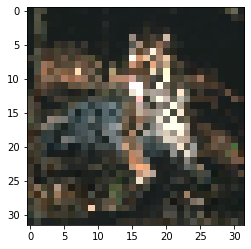

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.imshow(test_image1)